In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score 
)
from sklearn.model_selection import cross_val_score

import joblib
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append('../src')
from data.preprocessing import load_processed_data, load_transformers

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [25]:
# Load data and transformers 
print("Loading preprocessed data...")
data = load_processed_data()
scaler, encoder = load_transformers()

# Extract the datasets 
X_train = data['X_train'].values
X_val = data['X_val'].values
X_test = data['X_test'].values 

y_train = data['y_train'].values.ravel()
y_val = data['y_val'].values.ravel()
y_test = data['y_test'].values.ravel()

print(f'\n✅ Data loaded:')
print(f"   Train: {X_train.shape}")
print(f"   Val:   {X_val.shape}")
print(f"   Test:  {X_test.shape}")
print(f"   Classes: {len(encoder.classes_)}")


Loading preprocessed data...
✅ Loaded X_train: (1540, 7)
✅ Loaded X_val: (330, 7)
✅ Loaded X_test: (330, 7)
✅ Loaded y_train: (1540, 1)
✅ Loaded y_val: (330, 1)
✅ Loaded y_test: (330, 1)

✅ Loaded transformers:

✅ Data loaded:
   Train: (1540, 7)
   Val:   (330, 7)
   Test:  (330, 7)
   Classes: 22


In [26]:
models = {
    'Logistic Regression': LogisticRegression(
        max_iter = 1000,
        random_state= 42,
        multi_class= 'multinomial'
    ),

    'Random Forest': RandomForestClassifier(
        n_estimators= 100,
        max_depth= 20,
        random_state= 42, 
        n_jobs= -1
    ), 

    'XGBoost': XGBClassifier(
        n_estimators= 100,
        max_depth= 10,
        learning_rate= 0.1,
        random_state= 42,
        n_jobs= -1, 
        eval_metric= 'mlogloss'
    ),

    'SVM': SVC(
        kernel= 'rbf',
        C= 10,
        gamma= 'scale',
        random_state= 42
    ), 

    'KNN': KNeighborsClassifier(
        n_neighbors= 5, 
        weights= 'distance', 
        n_jobs= -1
    )
}

print("✅ Models defined:")
for name in models.keys():
    print(f"   - {name}")

✅ Models defined:
   - Logistic Regression
   - Random Forest
   - XGBoost
   - SVM
   - KNN


In [27]:
results = {}

print("="*70)
print("TRAINING MODELS")
print("="*70)

for name, model in models.items(): 
    print(f"\n{'='*70}")
    print(f"Training : {name}")
    print(f"{'='*70}") 

    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    precision = precision_score(y_val, y_val_pred, average='weighted')
    recall = recall_score(y_val, y_val_pred, average='weighted')

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'predictions': y_val_pred
    } 

    print(f"✅ Validation Results:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")

print("\n" + "="*70)
print("✅ ALL MODELS TRAINED!")
print("="*70)

TRAINING MODELS

Training : Logistic Regression
✅ Validation Results:
   Accuracy:  0.9758
   F1-Score:  0.9762
   Precision: 0.9778
   Recall:    0.9758

Training : Random Forest
✅ Validation Results:
   Accuracy:  0.9970
   F1-Score:  0.9970
   Precision: 0.9972
   Recall:    0.9970

Training : XGBoost
✅ Validation Results:
   Accuracy:  0.9909
   F1-Score:  0.9909
   Precision: 0.9915
   Recall:    0.9909

Training : SVM
✅ Validation Results:
   Accuracy:  0.9909
   F1-Score:  0.9909
   Precision: 0.9913
   Recall:    0.9909

Training : KNN
✅ Validation Results:
   Accuracy:  0.9697
   F1-Score:  0.9698
   Precision: 0.9739
   Recall:    0.9697

✅ ALL MODELS TRAINED!


Model Performance Comparison:


,Model,Accuracy,F1-Score,Precision,Recall
1,Random Forest,0.996970,0.996966,0.997159,0.996970
2,XGBoost,0.990909,0.990899,0.991477,0.990909
3,SVM,0.990909,0.990902,0.991288,0.990909
0,Logistic Regression,0.975758,0.976206,0.977841,0.975758
4,KNN,0.969697,0.969795,0.973864,0.969697


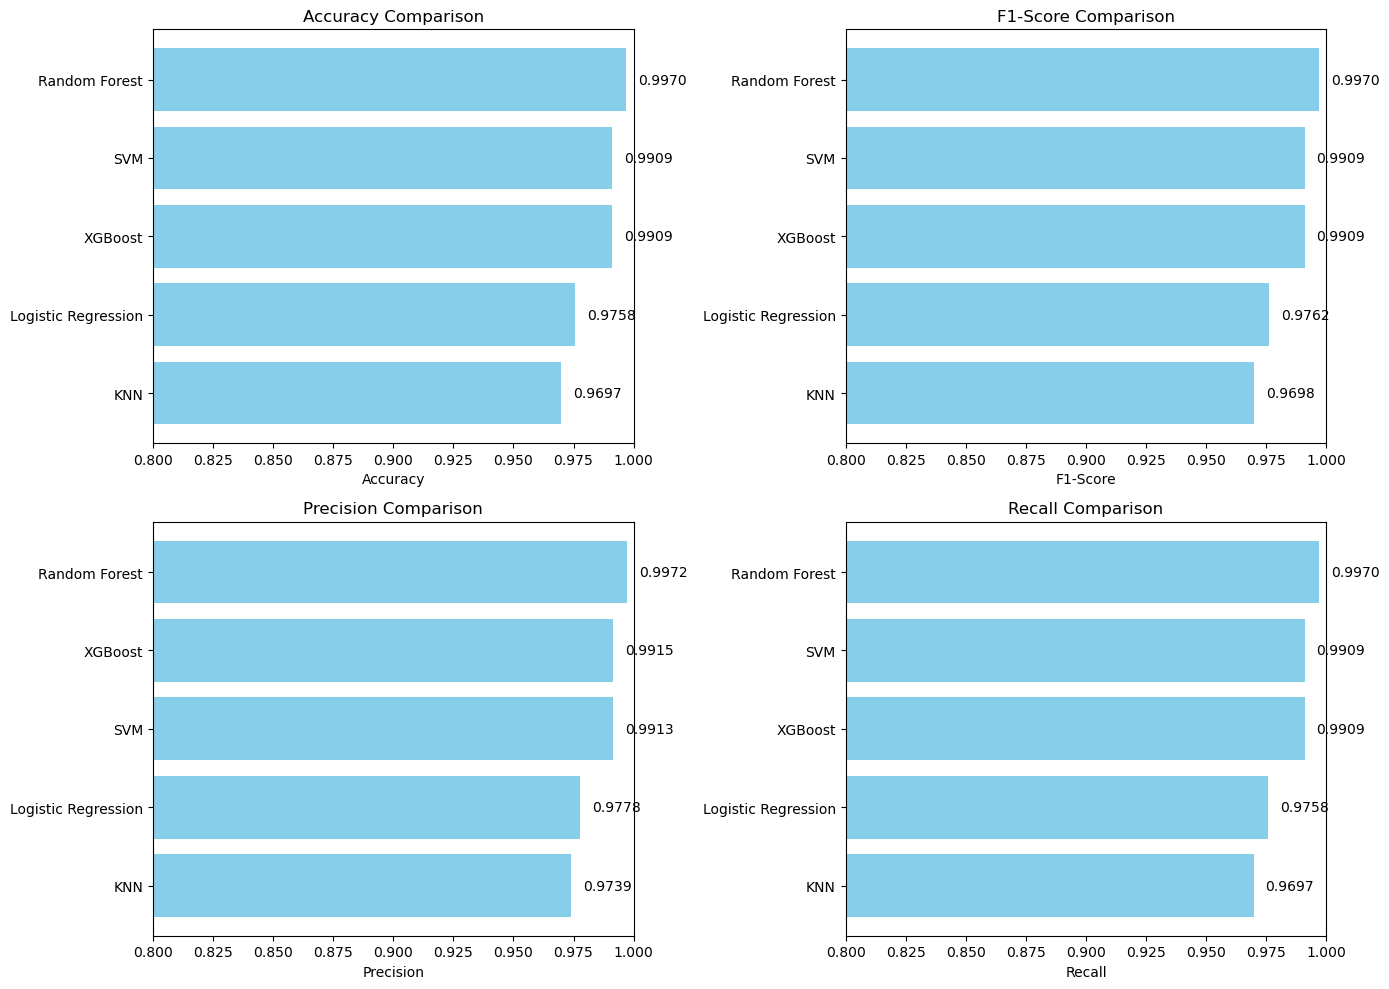

In [40]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending= False)

print("Model Performance Comparison:")
print("="*70)
display(comparison_df.style.highlight_max(subset=['Accuracy', 'F1-Score'], 
                                          color='green'))

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    data = comparison_df.sort_values(metric)
    ax.barh(data['Model'], data[metric], color='skyblue')
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlim([0.8, 1.0])  # Adjust based on your results
    
    # Add value labels
    for i, v in enumerate(data[metric]):
        ax.text(v + 0.005, i, f'{v:.4f}', va='center')

plt.tight_layout()


Best Model: Random Forest
Validation Accuracy: 0.9970


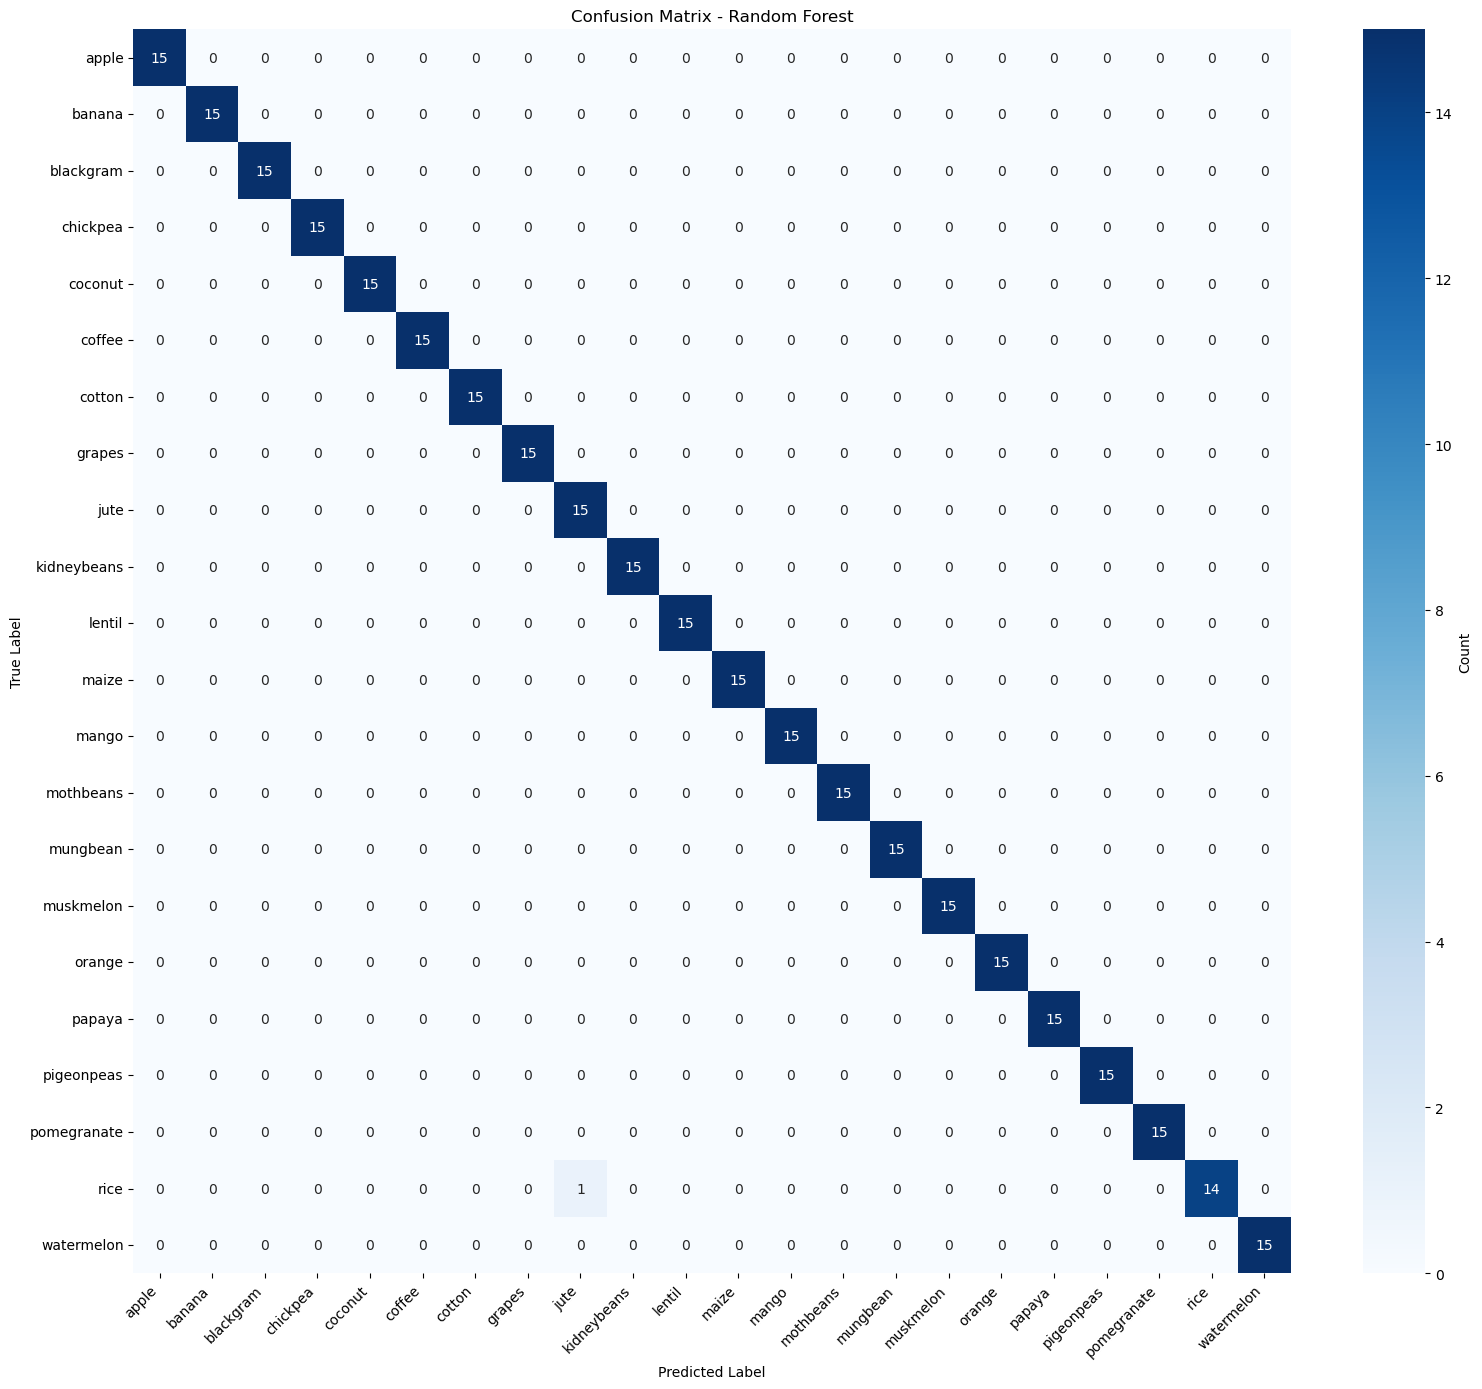

apple          : 1.0000
banana         : 1.0000
blackgram      : 1.0000
chickpea       : 1.0000
coconut        : 1.0000
coffee         : 1.0000
cotton         : 1.0000
grapes         : 1.0000
jute           : 1.0000
kidneybeans    : 1.0000
lentil         : 1.0000
maize          : 1.0000
mango          : 1.0000
mothbeans      : 1.0000
mungbean       : 1.0000
muskmelon      : 1.0000
orange         : 1.0000
papaya         : 1.0000
pigeonpeas     : 1.0000
pomegranate    : 1.0000
rice           : 0.9333
watermelon     : 1.0000


In [41]:
#Get best model 
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
y_val_pred_best = results[best_model_name]['predictions']

print(f"Best Model: {best_model_name}")
print(f"Validation Accuracy: {results[best_model_name]['accuracy']:.4f}")

#Confusion matrix 
cm = confusion_matrix(y_val, y_val_pred_best)

#Plot 
plt.figure(figsize= (16,14))
sns.heatmap(
    cm, 
    annot= True,
    fmt= 'd', 
    cmap= 'Blues', 
    xticklabels=encoder.classes_, 
    yticklabels=encoder.classes_, 
    cbar_kws={'label': 'Count'}
)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, crop in enumerate(encoder.classes_):
    print(f"{crop:15s}: {class_accuracies[i]:.4f}")


In [42]:
# Generate classification report
print(f"\nDetailed Classification Report - {best_model_name}")
print("="*70)

report = classification_report(
    y_val, 
    y_val_pred_best, 
    target_names=encoder.classes_,
    digits=4
)
print(report)


Detailed Classification Report - Random Forest
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        15
      banana     1.0000    1.0000    1.0000        15
   blackgram     1.0000    1.0000    1.0000        15
    chickpea     1.0000    1.0000    1.0000        15
     coconut     1.0000    1.0000    1.0000        15
      coffee     1.0000    1.0000    1.0000        15
      cotton     1.0000    1.0000    1.0000        15
      grapes     1.0000    1.0000    1.0000        15
        jute     0.9375    1.0000    0.9677        15
 kidneybeans     1.0000    1.0000    1.0000        15
      lentil     1.0000    1.0000    1.0000        15
       maize     1.0000    1.0000    1.0000        15
       mango     1.0000    1.0000    1.0000        15
   mothbeans     1.0000    1.0000    1.0000        15
    mungbean     1.0000    1.0000    1.0000        15
   muskmelon     1.0000    1.0000    1.0000        15
      orange     1.0000    1.0000

Cross-Validation Results (5-fold):

Random Forest:
   CV Scores: [0.99465241 0.99197861 0.99197861 0.99197861 1.        ]
   Mean: 0.9941 (+/- 0.0031)

XGBoost:
   CV Scores: [0.99197861 0.9973262  0.98930481 0.99465241 0.99465241]
   Mean: 0.9936 (+/- 0.0027)

SVM:
   CV Scores: [0.99197861 0.98395722 0.98395722 0.98128342 0.99197861]
   Mean: 0.9866 (+/- 0.0045)


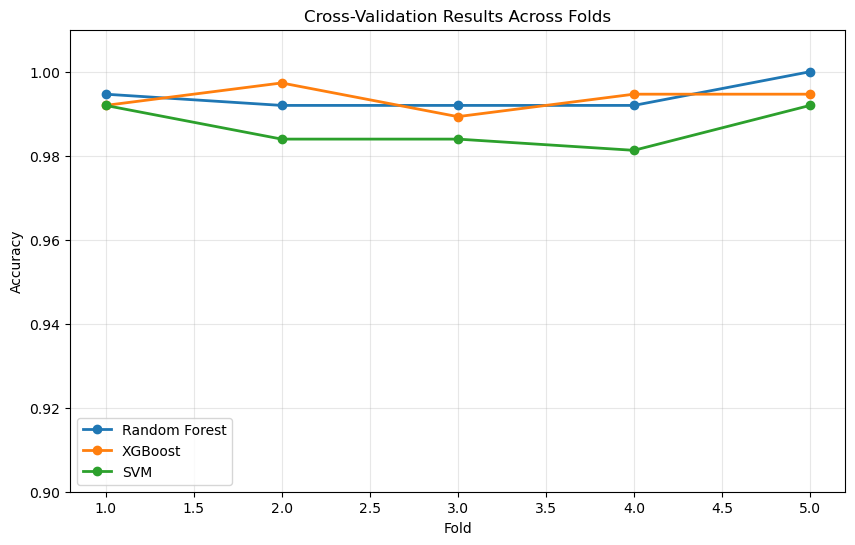

In [43]:
# Perform 5-fold CV on top 3 models
print("Cross-Validation Results (5-fold):")
print("="*70)

top_3_models = comparison_df.head(3)['Model'].tolist()

cv_results = {}

for model_name in top_3_models:
    model = results[model_name]['model']
    
    # Combine train + val for CV
    X_combined = np.vstack([X_train, X_val])
    y_combined = np.concatenate([y_train, y_val])
    
    # 5-fold CV
    cv_scores = cross_val_score(
        model, 
        X_combined, 
        y_combined, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
    cv_results[model_name] = {
        'mean': cv_scores.mean(),
        'std': cv_scores.std(),
        'scores': cv_scores
    }
    
    print(f"\n{model_name}:")
    print(f"   CV Scores: {cv_scores}")
    print(f"   Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Visualize CV results
plt.figure(figsize=(10, 6))
for model_name, cv_data in cv_results.items():
    plt.plot(range(1, 6), cv_data['scores'], 'o-', label=model_name, linewidth=2)

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results Across Folds')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([0.90, 1.01])  
plt.show()

In [44]:
# Evaluate best model on test set (ONLY ONCE!)
print(f"Final Test Set Evaluation - {best_model_name}")
print("="*70)

y_test_pred = best_model.predict(X_test)

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\n✅ Test Set Performance:")
print(f"   Accuracy:  {test_accuracy:.4f}")
print(f"   F1-Score:  {test_f1:.4f}")

# Comparison with validation
print(f"\n📊 Validation vs Test:")
print(f"   Val Accuracy:  {results[best_model_name]['accuracy']:.4f}")
print(f"   Test Accuracy: {test_accuracy:.4f}")
print(f"   Difference:    {abs(results[best_model_name]['accuracy'] - test_accuracy):.4f}")

if abs(results[best_model_name]['accuracy'] - test_accuracy) < 0.02:
    print("\n✅ Model generalizes well! (< 2% difference)")
else:
    print("\n⚠️  Consider investigating overfitting")

Final Test Set Evaluation - Random Forest

✅ Test Set Performance:
   Accuracy:  0.9939
   F1-Score:  0.9939

📊 Validation vs Test:
   Val Accuracy:  0.9970
   Test Accuracy: 0.9939
   Difference:    0.0030

✅ Model generalizes well! (< 2% difference)


In [23]:
# Save the best model
model_filename = f"../models/{best_model_name.lower().replace(' ', '_')}_model.pkl"
joblib.dump(best_model, model_filename)

print(f"✅ Best model saved: {model_filename}")
print(f"\nModel Info:")
print(f"   Name: {best_model_name}")
print(f"   Val Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   Test Accuracy: {test_accuracy:.4f}")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'val_accuracy': results[best_model_name]['accuracy'],
    'test_accuracy': test_accuracy,
    'val_f1_score': results[best_model_name]['f1_score'],
    'test_f1_score': test_f1,
    'num_classes': len(encoder.classes_),
    'classes': encoder.classes_.tolist()
}

import json
with open('../models/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print("\n✅ Metadata saved: ../models/model_metadata.json")

,Model,Accuracy,F1-Score,Precision,Recall
0,Logistic Regression,0.975758,0.976206,0.977841,0.975758
1,Random Forest,0.996970,0.996966,0.997159,0.996970
2,XGBoost,0.990909,0.990899,0.991477,0.990909
3,SVM,0.990909,0.990902,0.991288,0.990909
4,KNN,0.969697,0.969795,0.973864,0.969697
